<a href="https://colab.research.google.com/github/soma2000-lang/internship/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_recommenders

     |████████████████████████████████| 81kB 4.4MB/s 


In [6]:
import tensorflow as tf
 
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

In [7]:
import os
import re

import tensorflow.compat.v2 as tf

In [5]:
from __future__ import print_function

import numpy as np
import pandas as pd
import collections
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from matplotlib import pyplot as plt
import sklearn
import sklearn.manifold
import tensorflow as tf
from sklearn import preprocessing
import time
import seaborn as sns
import re
from gensim.models import word2vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import os
from keras.models import Sequential

from keras.layers import Embedding

In [6]:
triplets_file = '/content/10000.txt'
songs_metadata_file = '/content/songs.csv'

song_df_1 = pd.read_table(triplets_file,header=None)
song_df_1.columns 

#Read song  metadata
song_df_2 =  pd.read_csv(songs_metadata_file)

In [16]:
song_df_1.columns 

Index(['user_id', 'song_id', 'listen_count'], dtype='object')

In [7]:
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0


In [8]:
song_df_2.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0


In [9]:
len(song_df_2.artist_name.unique())

22595

In [18]:
song_df_1.columns


Index(['user_id', 'song_id', 'listen_count'], dtype='object')

AttributeError: ignored

In [20]:
song_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118282 entries, 0 to 118281
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       118282 non-null  object 
 1   song_id       118282 non-null  object 
 2   listen_count  118281 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.7+ MB


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


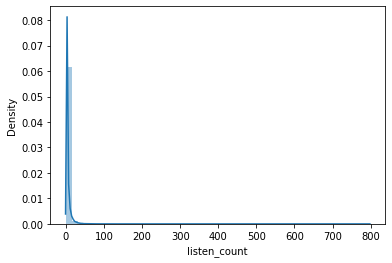

In [25]:
sns.distplot(song_df_1['listen_count'])

In [27]:
len(song_df_1)

118282

AttributeError: ignored

In [35]:
class Song(song_df_1,song_df_2):
  """MovieLens prediction model."""
 
  def __init__(self):
    # The `__init__` method sets up the model architecture.
    super().__init__()
 
    # How large the representation vectors are for inputs: larger vectors make
    # for a more expressive model but may cause over-fitting.
  
    num_unique_users = 10
    num_unique_song= 1700
    embedding_dim = 32

   

In [37]:
user_model = tf.keras.Sequential([
      # We first turn the raw user ids into contiguous integers by looking them
      # up in a vocabulary.
      tf.keras.layers.experimental.preprocessing.StringLookup(
          max_tokens=10),
      # We then map the result into embedding vectors.
      tf.keras.layers.Embedding(len(song_df_1), 32)
    ])

In [38]:
def compute_loss(self, features, training=False):
    # The `compute_loss` method determines how loss is computed.
 
    # Compute user and item embeddings.
    user_embeddings = self.song_df_1(features["user_id"])
    song_embeddings = self.song_df_1(features["song_id"])
 
    # Pass them into the task to get the resulting loss. The lower the loss is, the
    # better the model is at telling apart true watches from watches that did
    # not happen in the training data.
    return self.task(user_embeddings, movie_embeddings)

In [39]:
# concatenation of the datasets stock_price and stock_headlines
re_data = pd.concat([song_df_1,song_df_2], axis=1)

re_data.dropna(axis=0, inplace=True)

# displaying the combined stock_data
re_data

,user_id,song_id,listen_count,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1.0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5.0,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520.0,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
...,...,...,...,...,...,...,...,...,...,...
105645,4e3573033cd3e02ebc223b547337eaf95b44e67f,SOTVLQY12A58A798C2,2.0,XzlqaGvA/pyAxAMSJY/sGBox3S394RUuiPbGMx92BO8=,335229.0,465,JUJU,Naohisa Taniguchi,Miyuki Hashimoto,17.0
105646,4e3573033cd3e02ebc223b547337eaf95b44e67f,SOTXONM12A8C13AAA6,3.0,ZlUIYVYYqDEsH4y1UAhTJLc9HNWt9ur4d71/SFJw4qk=,232071.0,444|139,Urban Zakapa,Jo Hyuna,Jo Hyuna,31.0
105648,4e3573033cd3e02ebc223b547337eaf95b44e67f,SOUUZPU12A6701FB90,1.0,V1+3eERQv22nm1tHtajpv5LUlnIWgkEILDjDEQHANYw=,399754.0,1616,Jazzanova,Stefan Leisering,Paul Randolph,52.0
105649,4e3573033cd3e02ebc223b547337eaf95b44e67f,SOUYPYF12A58A76897,1.0,yayhKbuUELczSCdcoYcmH3kyt1hMyrHAAEWQv4GnTGw=,197860.0,359,Hey Monday,Cassadee Pope| Sam Hollander| Dave Katz| Butch...,Cassadee Pope| Sam Hollander| Dave Katz| Butch...,52.0


In [42]:
user_model = tf.keras.Sequential([
      # We first turn the raw user ids into contiguous integers by looking them
      # up in a vocabulary.
      tf.keras.layers.experimental.preprocessing.StringLookup(
          max_tokens=10),
      # We then map the result into embedding vectors.
      tf.keras.layers.Embedding(len(re_data), 32)
    ])

In [41]:
def compute_loss(self, features, training=False):
    # The `compute_loss` method determines how loss is computed.
 
    # Compute user and item embeddings.
    user_embeddings = self.re_data(features["user_id"])
    song_embeddings = self.re_data(features["song_id"])
 
    # Pass them into the task to get the resulting loss. The lower the loss is, the
    # better the model is at telling apart true watches from watches that did
    # not happen in the training data.
    return self.task(user_embeddings, song_embeddings)

In [ ]:
model = Song()
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))
 
model.fit()

In [ ]:

index = re_data(model.user_model)



# Get recommendations.
_, titles = (tf.constant(["42"]))
print(f"Recommendations for user 42: {t[0, :3]}")